Importing libraries

In [1]:
import os  # Provides functions to interact with the operating system
import matplotlib.pyplot as plt  # For plotting graphs and visualizing data

# TensorFlow and Keras imports for deep learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generating tensor image data batches with live data augmentation
from tensorflow.keras.models import Sequential  # Sequential model is a linear stack of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # Importing layers for the model
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping during training
from tensorflow.keras.optimizers import Adam  # Adam optimizer for compiling the model
from tensorflow.keras.layers import Conv2D, MaxPool2D # Importing layers for the model
from tabulate import tabulate
from PIL import Image

In [2]:
train_data_dir = 'data/train/' # Directory where training data is stored
validation_data_dir = 'data/test/' # Directory where validation data is stored

Quick Overview of the Data

In [3]:
# Function to get 3 image size for every class 
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# Check the number of images in each class in the training data
train_data_counts = {}
for class_name in os.listdir(train_data_dir):
    class_path = os.path.join(train_data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = 0
        print(f"Class: {class_name}")
        for img_file in os.listdir(class_path)[:3]:  # Select first five images
            if img_file.endswith(('.png', '.jpg', '.jpeg', '.gif')):
                img_path = os.path.join(class_path, img_file)
                num_images += 1
                # Get size of individual image
                width, height = get_image_size(img_path)
                print(f"Image: {img_file}, Size: {width}x{height}")
        train_data_counts[class_name] = num_images



Class: angry
Image: Training_10118481.jpg, Size: 48x48
Image: Training_10120469.jpg, Size: 48x48
Image: Training_10131352.jpg, Size: 48x48
Class: disgust
Image: Training_10371709.jpg, Size: 48x48
Image: Training_10598340.jpg, Size: 48x48
Image: Training_1070239.jpg, Size: 48x48
Class: fear
Image: Training_10018621.jpg, Size: 48x48
Image: Training_10031494.jpg, Size: 48x48
Image: Training_10110501.jpg, Size: 48x48
Class: happy
Image: Training_10019449.jpg, Size: 48x48
Image: Training_10046809.jpg, Size: 48x48
Image: Training_10066226.jpg, Size: 48x48
Class: neutral
Image: Training_10002154.jpg, Size: 48x48
Image: Training_10031781.jpg, Size: 48x48
Image: Training_10055498.jpg, Size: 48x48
Class: sad
Image: Training_10022789.jpg, Size: 48x48
Image: Training_10031481.jpg, Size: 48x48
Image: Training_10048646.jpg, Size: 48x48
Class: surprise
Image: Training_10013223.jpg, Size: 48x48
Image: Training_1002457.jpg, Size: 48x48
Image: Training_10028230.jpg, Size: 48x48


In [4]:
# Check the number of images in each class in the training data
train_data_counts = {}
for class_name in os.listdir(train_data_dir):
    class_path = os.path.join(train_data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_data_counts[class_name] = num_images

print("Number of images in each class in the training data:")
print(train_data_counts)

Number of images in each class in the training data:
{'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}


In [5]:
# Check the number of images in each class in the validation data
validation_data_counts = {}
for class_name in os.listdir(validation_data_dir):
    class_path = os.path.join(validation_data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_data_counts[class_name] = num_images

print("Number of images in each class in the validation data:")
print(validation_data_counts)

Number of images in each class in the validation data:
{'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


In [8]:
def count_images(data_dir):
    class_counts = {}
    total_images = 0

    # Iterate over each class directory
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            image_count = len([filename for filename in os.listdir(class_dir) if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp'))])
            class_counts[class_name] = image_count
            total_images += image_count

    return class_counts, total_images

In [9]:
# Count images in training data
train_class_counts, total_train_images = count_images(train_data_dir)

# Create table for training data
train_table_data = [[class_name, count] for class_name, count in train_class_counts.items()]
train_table_data.append(['Total', total_train_images])

# Count images in validation data
validation_class_counts, total_validation_images = count_images(validation_data_dir)

# Create table for validation data
validation_table_data = [[class_name, count] for class_name, count in validation_class_counts.items()]
validation_table_data.append(['Total', total_validation_images])

# Display tables
print("Training Data:")
print(tabulate(train_table_data, headers=['Class', 'Number of Images']))

print("\nValidation Data:")
print(tabulate(validation_table_data, headers=['Class', 'Number of Images']))

Training Data:
Class       Number of Images
--------  ------------------
angry                   3995
disgust                  436
fear                    4097
happy                   7215
neutral                 4965
sad                     4830
surprise                3171
Total                  28709

Validation Data:
Class       Number of Images
--------  ------------------
angry                    958
disgust                  111
fear                    1024
happy                   1774
neutral                 1233
sad                     1247
surprise                 831
Total                   7178


Data augmentation for training data

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Randomly shear (slant) images by up to 20%
    zoom_range=0.2,  # Randomly zoom into images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest')  # Fill in any newly created pixels after transformation with the nearest pixel value

In [11]:
# No augmentation for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

Train data generator

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,  # Directory where training data is stored
    color_mode='grayscale',  # Images are in grayscale
    target_size=(48, 48),  # Resize images to 48x48 pixels
    batch_size=32,  # Number of images to be yielded from the generator per batch
    class_mode='categorical')  # Classification mode for multi-class classification (one-hot encoded labels)

Found 28709 images belonging to 7 classes.


Validation data generator

In [13]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, # Directory where validation data is stored
    color_mode='grayscale', # Images are in grayscale
    target_size=(48, 48), # Resize images to 48x48 pixels
    batch_size=32,  # Number of images to be yielded from the generator per batch
    class_mode='categorical')  # Classification mode for multi-class classification (one-hot encoded labels)

Found 7178 images belonging to 7 classes.


Model design

In [14]:
# Sequential Model 
model = Sequential()

# First convolutional layer
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))  # 512 filters, 3x3 kernel, ReLU activation, 'same' padding
model.add(BatchNormalization())  # Batch normalization
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))  # 512 filters, 3x3 kernel, ReLU activation, 'same' padding
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 max pooling
model.add(Dropout(0.25))  # Dropout to prevent overfitting

# Second convolutional layer
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))  # 256 filters, 3x3 kernel, ReLU activation, 'same' padding
model.add(BatchNormalization())  # Batch normalization
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))  # 256 filters, 3x3 kernel, ReLU activation, 'same' padding
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 max pooling
model.add(Dropout(0.25))  # Dropout to prevent overfitting

# Third convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))  # 128 filters, 3x3 kernel, ReLU activation, 'same' padding
model.add(BatchNormalization())  # Batch normalization
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))  # 128 filters, 3x3 kernel, ReLU activation, 'same' padding
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D(pool_size=(2, 2))) # 2x2 max pooling
model.add(Dropout(0.25)) # Dropout to prevent overfitting

# Fully connected layers
model.add(Flatten())

model.add(Dense(64, activation='relu')) # Fully connected layer with 64 units, ReLU activation
model.add(BatchNormalization()) # Batch normalization
model.add(Dropout(0.5)) # Dropout to prevent overfitting
model.add(Dense(7, activation='softmax')) # Output layer with 7 units (for 7 classes), softmax activation


c:\Users\AHMAD\anaconda3\envs\python3115\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model with a lower learning rate
opt = Adam(learning_rate=0.0001)  # Create an Adam optimizer with a learning rate of 0.0001
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with the new optimizer

Train the model

In [16]:
history = model.fit(
    train_generator, # Training generator data
    steps_per_epoch=train_generator.n // train_generator.batch_size, # Number of batches per epoch
    epochs=100, # Total number of epochs for training
    validation_data=validation_generator, # Validation data generator
    validation_steps=validation_generator.n // validation_generator.batch_size)  # Number of batches for validation

Epoch 1/100


c:\Users\AHMAD\anaconda3\envs\python3115\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 3607s 4s/step - accuracy: 0.1626 - loss: 2.7520 - val_accuracy: 0.2782 - val_loss: 1.8458
Epoch 2/100
  1/897 ━━━━━━━━━━━━━━━━━━━━ 46:17 3s/step - accuracy: 0.3438 - loss: 2.4188

c:\Users\AHMAD\anaconda3\envs\python3115\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 346us/step - accuracy: 0.3438 - loss: 2.4188 - val_accuracy: 0.1000 - val_loss: 1.9503
Epoch 3/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 2891s 3s/step - accuracy: 0.1916 - loss: 2.2610 - val_accuracy: 0.2981 - val_loss: 1.7763
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 273us/step - accuracy: 0.2500 - loss: 1.9532 - val_accuracy: 0.0000e+00 - val_loss: 1.9425
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 2946s 3s/step - accuracy: 0.2153 - loss: 2.1209 - val_accuracy: 0.3098 - val_loss: 1.7397
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 311us/step - accuracy: 0.3125 - loss: 1.7076 - val_accuracy: 0.6000 - val_loss: 1.6298
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 3151s 4s/step - accuracy: 0.2383 - loss: 2.0087 - val_accuracy: 0.3248 - val_loss: 1.7142
Epoch 8/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 304us/step - accuracy: 0.1875 - loss: 1.9847 - val_accuracy: 0.1000 - val_loss: 1.7407
Epoch 9/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 3150s 4s/step - accuracy: 0.2604 - loss: 1.9430 - 

Save Model 

In [17]:
model.save('model_fite.h5')

Plotting

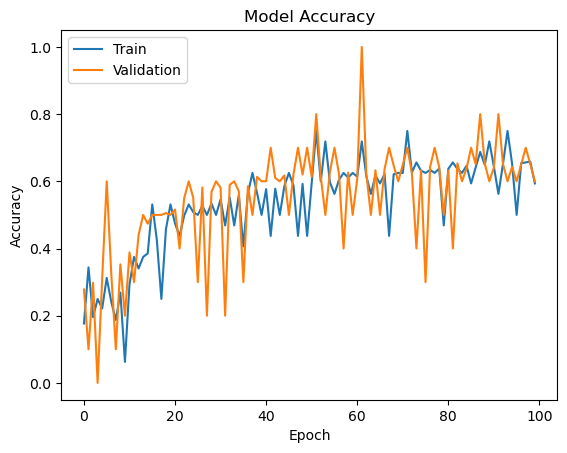

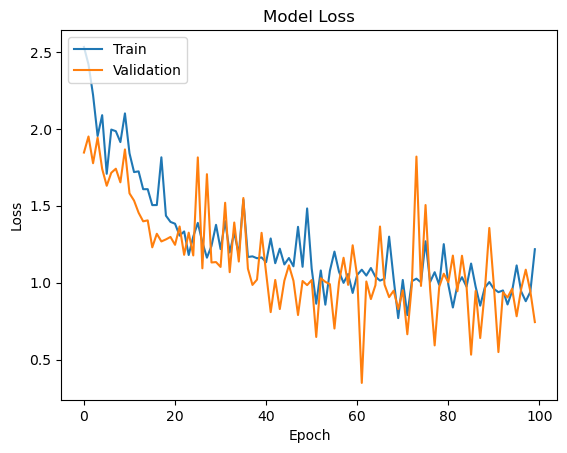

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy']) # Plot training accuracy
plt.plot(history.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model Accuracy')  # Set the title of the plot
plt.xlabel('Epoch')  # Set the label for the x-axis
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.legend(['Train', 'Validation'], loc='upper left')  # Add a legend to the plot
plt.show() # Show the plot

# Plot training & validation loss values
plt.plot(history.history['loss'])  # Plot training loss
plt.plot(history.history['val_loss']) # Plot validation loss
plt.title('Model Loss') # Set the title of the plot
plt.xlabel('Epoch')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.legend(['Train', 'Validation'], loc='upper left') # Add a legend to the plot
plt.show() # Show the plot